Ce code est une implémentation d'une fonction generation_point qui génère 50 points aléatoires selon une distribution normale.

Dans la fonction generation_point, les paramètres d'entrée sont:

ecarttype : l'écart-type de la distribution normale
intervalle : une valeur aléatoire générée par la fonction np.random.randint(-5,5) qui définit l'intervalle des valeurs des coordonnées des points selon la relation a*x + b, où a et b sont les bornes de intervalle.
abcisse : un tuple qui définit l'intervalle des valeurs de l'abcisse x.
Dans cette fonction, on utilise np.random.uniform(0,20,50) pour générer 50 nombres aléatoires entre 0 et 20 qui seront les valeurs de l'abcisse x des 50 points.

Ensuite, on calcule la moyenne moyenne des ordonnées des 50 points selon la relation a*x + b. Pour générer les valeurs des ordonnées, on utilise np.random.normal(loc=moyenne,scale= ecarttype) qui retourne un nombre aléatoire de la distribution normale centrée sur moyenne avec un écart-type de ecarttype.

Finalement, on affiche les coordonnées de chaque point généré.

Dans le reste du code, on utilise les coordonnées des points pour tracer deux droites:

la première droite est tracée en utilisant les valeurs de a et b choisis aléatoirement.
la deuxième droite est tracée en calculant les valeurs de a et b en utilisant la méthode des moindres carrés pour ajuster la droite qui minimise la somme des carrés des distances entre les points et la droite.
Le code affiche également les nuages de points, ainsi que les deux droites tracées avec leurs coefficients respectifs.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)
x = np.random.uniform(0,20,50)
print("le nombre de point aleatoire generée est de : "+str(np.size(x)))
print("les coordonnées de x :" +str(x)  )

le nombre de point aleatoire generée est de : 50
les coordonnées de x :[ 8.71989804  0.51852464 10.99324956  8.70644785  8.40735604  6.60669642
  4.09297268 12.38541933  5.99309347  5.3365455  12.42267666 10.58284189
  2.69159891 10.27156243  3.68879731 15.70670296 17.07950585  9.88473675
 16.93122971  1.59290954 10.1049218   1.30573009  8.56244655  1.93061831
  2.54319943 11.93490618  4.52024001  2.13891369  4.40612414  6.9965257
  9.35574969  4.03486453 12.8081345   9.66139671 10.1047344   7.73785302
 15.87274909 11.60008358  3.24597197 14.01504693 19.2910216  10.00016722
 17.79040128  6.83227305 11.34288255  8.55091927  8.73494526 15.5311837
 10.71208347 19.07484454]


In [3]:
def generation_point(ecarttype=4,intervalle =np.random.randint(-5,5),abcisse =(0,20,50)):
    np.random.seed(2)
    x = np.random.uniform(0,20,50)
    a= intervalle
    b=intervalle
    nb_point =(np.size(x))
    moyenne= (a*x + b)
    y=np.random.normal(loc=moyenne,scale= ecarttype)
    print("le nombre de point aleatoire generée est de : "+str(len(x)))
    for i in range(len(x)): 
      print("les coordonnées du point "+str(i) +" : " +str([x[i],y[i]])  )
    return x,y ,ecarttype ,moyenne


le nombre de point aleatoire generée est de : 50
les coordonnées du point 0 : [8.719898042840075, 6.40335688678096]
les coordonnées du point 1 : [0.5185246365578267, 1.8693655101911524]
les coordonnées du point 2 : [10.993249557574183, 15.994713103776963]
les coordonnées du point 3 : [8.706447852365537, 8.182077782304138]
les coordonnées du point 4 : [8.40735604174978, 7.904678349433806]
les coordonnées du point 5 : [6.6066964200774825, 7.308813368501559]
les coordonnées du point 6 : [4.09297268075685, 6.826958001063133]
les coordonnées du point 7 : [12.385419327013274, 18.498936248100748]
les coordonnées du point 8 : [5.993093473490463, 4.454376252773013]
les coordonnées du point 9 : [5.336545502057333, 8.37013047279106]
les coordonnées du point 10 : [12.422676655385898, 14.287140680440626]
les coordonnées du point 11 : [10.58284188554078, 4.14839234104679]
les coordonnées du point 12 : [2.691598906898671, 2.014332978287916]
les coordonnées du point 13 : [10.27156242531493, 10.7422468

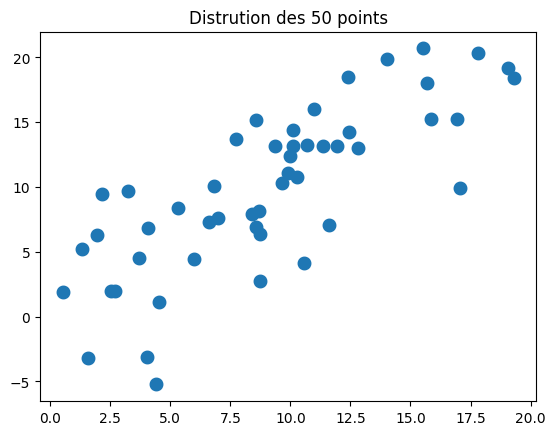

In [39]:
x,y ,ecarttype ,moyenne =generation_point( )
plt.title("Distrution des 50 points")
plt.scatter(x,y,lw =4)
plt.show()

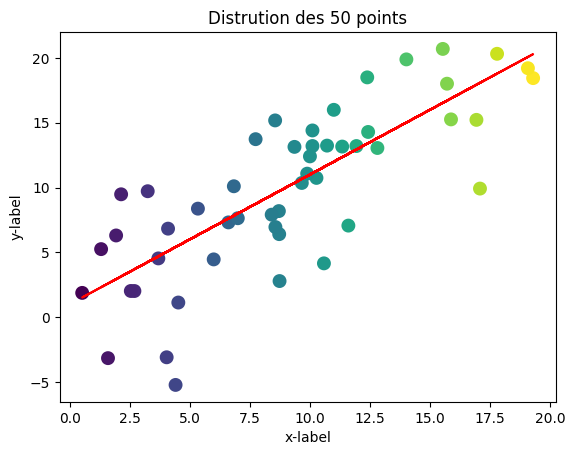

In [40]:

intervalle =np.random.randint(-5,5)
a =intervalle
b= intervalle
plt.title("Distrution des 50 points")
plt.xlabel("x-label")
plt.ylabel("y-label")
color = ["bleu"]
plt.scatter(x,y,lw=ecarttype,c=x,label = y)
plt.plot(x,moyenne, c='r')

plt.show()

In [9]:
a_num =np.cov(x.T,y.T)[0][1]/np.var(x)
b_num =np.mean(y)- a_num * np.mean(b)

a_num,b_num

(1.0149180957413888, 13.890084887796649)

In [17]:
new_a =np.cov(x.T,y.T)[0][1]/np.var(x)
new_b =np.mean(y)- new_a * np.mean(x)
print ("coficient de la droit : "+str([new_a,new_b]))


coficient de la droit : [1.0149180957413888, 0.6280750714149175]


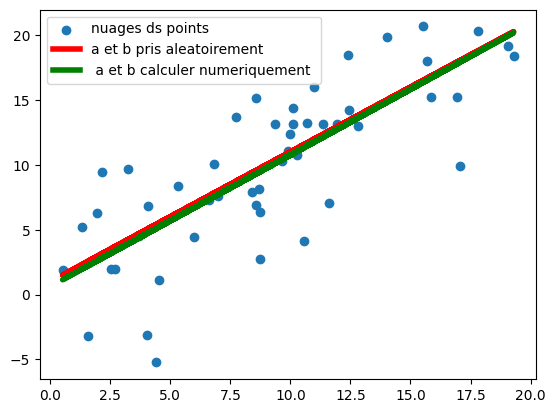

In [18]:
plt.scatter(x,y,label ='nuages ds points')
new_y = new_a * x + new_b
plt.plot(x,moyenne, c='r',lw=4, label ='a et b pris aleatoirement')
plt.plot(x,new_y, c= 'g',lw=4, label=' a et b calculer numeriquement ')
plt.legend()
plt.show()


Ce code implémente une descente de gradient pour trouver les coefficients d'une droite de régression linéaire qui s'ajuste au mieux aux données.

La fonction descente_de_gradient prend en entrée les données x et y, le taux d'apprentissage alpha et le nombre d'époques epoches. Elle commence par ajouter une colonne de 1 à la matrice x pour inclure le biais dans les calculs. Puis elle initialise les coefficients de la droite à des valeurs aléatoires. Elle effectue ensuite epoches itérations de la descente de gradient pour ajuster les coefficients en utilisant la formule du gradient. À chaque itération, elle affiche les coordonnées de la droite calculée. Finalement, elle retourne les coefficients de la droite entraînée.

Le code génère ensuite des données aléatoires x et y, puis entraîne le modèle en appelant la fonction descente_de_gradient. Il utilise ensuite les coefficients de la droite entraînée pour faire des prédictions sur une grille de points x_grid. Enfin, il trace les données et la droite ajustée.

Les coordonnées de la droite à l'époque 0: [1.4254393766531632, 0.914584210594149]
Les coordonnées de la droite à l'époque 1: [1.4107006798284627, 0.9248843671270454]
Les coordonnées de la droite à l'époque 2: [1.3961025176692976, 0.9350966517327408]
Les coordonnées de la droite à l'époque 3: [1.3816435432868666, 0.9452218042137888]
Les coordonnées de la droite à l'époque 4: [1.3673224227690932, 0.9552605582531833]
Les coordonnées de la droite à l'époque 5: [1.353137835054931, 0.9652136414637583]
Les coordonnées de la droite à l'époque 6: [1.3390884718098908, 0.9750817754372016]
Les coordonnées de la droite à l'époque 7: [1.3251730373027801, 0.9848656757926879]
Les coordonnées de la droite à l'époque 8: [1.311390248283645, 0.9945660522251314]
Les coordonnées de la droite à l'époque 9: [1.2977388338628975, 1.004183608553063]
Les coordonnées de la droite à l'époque 10: [1.2842175353916216, 1.0137190427661338]
Les coordonnées de la droite à l'époque 11: [1.2708251063430451, 1.023173047072

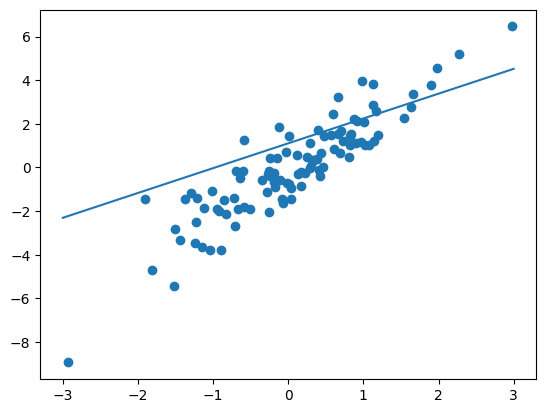

In [41]:
import numpy as np

def descente_de_gradient(x, y, alpha, epoches):
    n = len(y)
    x = np.column_stack((np.ones((n, 1)), x)) # Add a column of ones for the bias term
    teta = np.random.randn(x.shape[1], 1)

    for i in range(epoches):
        grad = 1/n * (x.T.dot(x.dot(teta) - y))
        teta = teta - alpha * grad

        print("Les coordonnées de la droite à l'époque " + str(i) + ": " + str(list(teta.flatten())))

    return teta

# Generate some random data
x = np.random.randn(100, 1)
y = 2 * x + np.random.randn(100, 1)

# Train the model using gradient descent
teta_fonction = descente_de_gradient(x, y, alpha=0.01, epoches=25)

# Compute the predictions on a grid of points
x_grid = np.linspace(-3, 3, 100).reshape(-1, 1)
x_grid = np.column_stack((np.ones((x_grid.shape[0], 1)), x_grid))
y_pred = x_grid.dot(teta_fonction)

# Plot the data and the fitted line
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x_grid[:, 1], y_pred)
plt.show()


Ce code est une implémentation de la méthode de descente de gradient stochastique pour trouver la droite de régression linéaire à partir d'un ensemble de données.

Tout d'abord, un ensemble de données est généré avec des valeurs aléatoires pour x et y. Ensuite, les paramètres initiaux pour la descente de gradient stochastique sont initialisés avec des valeurs aléatoires. Le nombre d'itérations de l'algorithme de descente de gradient stochastique est fixé à 25.

La méthode de pas variable est définie avec une fonction Alpha_pas(t) qui prend un argument t correspondant au nombre total d'itérations effectuées jusqu'à présent. Cette fonction retourne un pas variable alpha qui diminue progressivement au fil des itérations.

Ensuite, la méthode SGD est définie pour appliquer la descente de gradient stochastique sur les données. Elle prend en entrée les données d'entraînement X et Y, les paramètres initiaux teta, et le nombre d'itérations n_iter. Elle transforme les données d'entrée en ajoutant une colonne de 1 pour le terme de biais, puis applique la descente de gradient stochastique en choisissant aléatoirement un point à chaque itération.

Enfin, la méthode stochastique de la descente de gradient est appliquée sur les données générées avec les paramètres initiaux en utilisant la méthode SGD. La droite de régression linéaire obtenue est affichée en utilisant les paramètres optimaux trouvés avec la méthode stochastique de la descente de gradient.

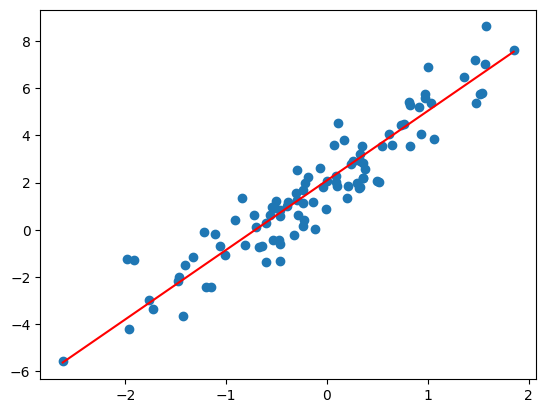

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires
np.random.seed(42)
x = np.random.randn(100)
y = 3 * x + 2 + np.random.randn(100)

# Initialiser les paramètres
teta = np.random.randn(2, 1)
n = len(x)
ilot = 10
t0, t1 = 5, 10

# Définir la fonction de pas variable
def Alpha_pas(t):
    return t0 / (t + t1)

# Définir la méthode stochastique de la descente de gradient
def SGD(X, Y, teta, n_iter):
    X = np.hstack((X.reshape(X.shape[0], 1), np.ones((X.shape[0], 1))))
    for i in range(n_iter):
        for j in range(n):
            rand_i = np.random.randint(0, n)
            xi = X[rand_i:rand_i+1]
            yi = Y[rand_i:rand_i+1]
            grad = 2 * xi.T.dot(xi.dot(teta) - yi)
            alpha = Alpha_pas(i * n + j)
            teta = teta - alpha * grad
    return teta

# Appliquer la méthode stochastique de la descente de gradient sur les données
teta_s = SGD(x, y, teta, 25)

teta_s

# Afficher la droite de régression linéaire obtenue par la méthode stochastique de la descente de gradient
x_grid = np.linspace(x.min(), x.max(), 100)
y_pred = teta_s[0][0] * x_grid + teta_s[1][0]
plt.scatter(x, y)
plt.plot(x_grid, y_pred, c='r')
plt.show()


In [35]:
import time 


In [47]:
import time

start = time.time()
a_num =np.cov(x.T,y.T)[0][1]/np.var(x)
b_num =np.mean(y)- a_num * np.mean(b)

a_num,b_num
end = time.time()
time1 =end -start
start2 = time.time()
descente_de_gradient(x,y, alpha= 0.001, epoches= 25)
end2 = time.time()

time2 =end2 -start2

start3 = time.time()
SGD(x, y, teta, 25)
end3 = time.time()

time3 =end3-start3

print("le temps de convergence de la methode analytique :"+str(time1))
print("le temps de convergence de la methode de la decente du gradient  :"+str(time2))
print("le temps de convergence de la methode stocastique :"+str(time3))




Les coordonnées de la droite à l'époque 0: [-1.2379400245152403, -1.2388502344585026, -1.2364144451344483, -1.2342479839322211, -1.2388785420680597, -1.2383131562462566, -1.2313909718844909, -1.2355379142319332, -1.2391656689993058, -1.236461562017232, -1.24132382052596, -1.2394384993683836, -1.2372286792075844, -1.2412913948537116, -1.2433819106945438, -1.239400111477613, -1.2410880013629322, -1.2382407322720574, -1.2395960456442723, -1.2414997743035427, -1.2328268179784159, -1.239601512588478, -1.2364094173072238, -1.2436908918536562, -1.239061087311999, -1.235491572837284, -1.2424583132896212, -1.2374539999067893, -1.2397170609368924, -1.2393933531357197, -1.2413705794999779, -1.2323893987038907, -1.2391175916201635, -1.240714336588456, -1.2364665857301478, -1.2401273927771193, -1.2381714587395456, -1.2442158681200686, -1.2411858371615492, -1.2386550768410503, -1.2355719365576332, -1.2361935486343714, -1.2399692243139495, -1.2387334734604591, -1.2421904794090775, -1.2393925059856306

In [4]:
from sklearn.datasets import fetch_openml
from sklearn import svm
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import svm
import numpy as np
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.datasets import *

# Charger les données MNIST
mdigit = load_digits()
dig = pd.DataFrame(mdigit['data'][0:1700])
dig.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
mdigit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

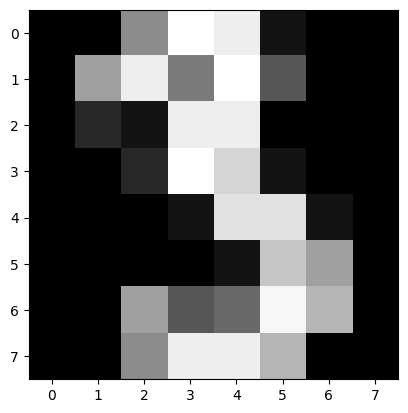

In [10]:
import matplotlib.pyplot as plt
def displayImage(i):
    plt.imshow(mdigit['images'][i], cmap='Greys_r')
    plt.show()
#Affichage du premier élément du jeu de données 
displayImage(3) 

In [13]:
from sklearn.model_selection import train_test_split
X = mdigit.data # les input variables
y = mdigit.target # les étiquettes (output variable)



# utilisation d'un  classifier (SVM)
Le code est une implémentation de l'algorithme d'optimisation Hypergradient Descent  qui optimise à la fois les poids et les hyperparamètres d'une machine à vecteurs de support (SVM) pour la classification sur l'ensemble de données (diagnostic) sur le cancer du sein du Wisconsin.

Le modèle SVM utilisé dans le code a un noyau linéaire, et l'algorithme d'optimisation est utilisé pour trouver la valeur optimale du paramètre de régularisation (C), qui contrôle le compromis entre la marge et l'erreur de classification.

L'algorithme  utilise le Hessien de la fonction de perte par rapport aux poids et l'hyperparamètre pour calculer le gradient de la perte par rapport à l'hyperparamètre, et le produit Hessien-vecteur inverse approximatif pour calculer la direction de la descente des poids.

Le code imprime la perte et l'hyperparamètre à chaque itération de l'algorithme et le score de précision final sur l'ensemble de test. Il trace également la perte en fonction des itérations. L'algorithme s'arrête lorsque la valeur absolue du gradient de la perte par rapport à l'hyperparamètre est inférieure à une valeur de tolérance donnée.








Iteration 1: loss=0.03296703296703296, lambda=0.009905612758954217
Iteration 2: loss=0.03296703296703296, lambda=0.009812363464774768
Iteration 3: loss=0.03296703296703296, lambda=0.009720162701054864
Iteration 4: loss=0.03296703296703296, lambda=0.009628982030803724
Iteration 5: loss=0.03296703296703296, lambda=0.009538806255004464
Iteration 6: loss=0.03296703296703296, lambda=0.009449681406834071
Iteration 7: loss=0.03296703296703296, lambda=0.009361602294678532
Iteration 8: loss=0.03296703296703296, lambda=0.00927456486347632
Iteration 9: loss=0.03076923076923077, lambda=0.009188546098733616
Iteration 10: loss=0.03076923076923077, lambda=0.009103805806498251
Iteration 11: loss=0.03076923076923077, lambda=0.009020498649332562
Iteration 12: loss=0.03076923076923077, lambda=0.008938920740392289
Iteration 13: loss=0.03076923076923077, lambda=0.008858723277604464
Iteration 14: loss=0.03076923076923077, lambda=0.008779956326418195
Iteration 15: loss=0.03076923076923077, lambda=0.008702849

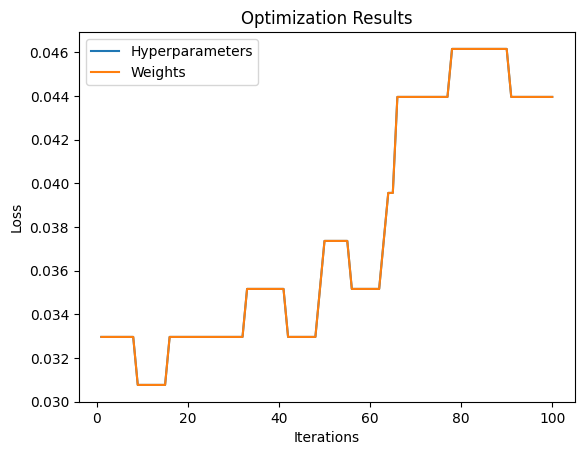

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Chargement de données du cancer du sein
data = load_breast_cancer()

# Division en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Création d'un pipeline qui effectue une transformation de mise à l'échelle et entraîne un modèle SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', C=1.0))
])

# Fonction de perte pour le modèle SVM
def loss_fn(model, X, y):
    y_pred = model.predict(X)
    return 1 - accuracy_score(y, y_pred)

# Fonction pour calculer le gradient de la perte par rapport aux poids
def grad_loss_w(model, X, y):
    y_pred = model.predict(X)
    y_diff = np.expand_dims(y - y_pred, axis=1)
    grad_w = -np.mean(y_diff * X, axis=0) + model.named_steps['clf'].coef_[0]
    return grad_w

# Fonction pour calculer le gradient de la perte par rapport à l'hyperparamètre lambda
def grad_loss_lambda(model, X, y, lambda_):
    LV = loss_fn(model, X, y)
    model.set_params(clf__C=lambda_.item())
    LT = loss_fn(model, X, y)
    grad_lambda = 2 * (LV - LT) * lambda_ + 2 * lambda_ * np.sum(model.named_steps['clf'].coef_ ** 2)
    return grad_lambda

# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
def approx_inverse_hvp(v, model, X, y):
    alpha = 1e-2
    damping = 1e-8
    iterations = 20
    p = v.copy()
    for i in range(iterations):
        grad = grad_loss_w(model, X, y)
        grad_prod = np.sum(grad * p)
        hessian_prod = grad_loss_w(model, X, y)
        if damping > 0:
            hessian_prod += damping * p
        p = v - alpha * hessian_prod
    return p / (grad_prod + damping)

# Initialisation des hyperparamètres lambda et des poids
lambda_ = np.array([0.01])
w = np.zeros(X_train.shape[1])

# Initialisation des listes pour stocker les valeurs de perte
losses_lambda = []
losses_w = []

# Définition des paramètres d'optimisation
learning_rate = 0.01
tolerance = 1e-6
max_iterations = 100

# Boucle d'optimisation des hyperparamètres
for i in range(100):
    # Entraînement du modèle avec les hyperparamètres actuels
# Entraînement du modèle avec les hyperparamètres actuels

    pipeline.set_params(clf__C=lambda_.item())
    
    pipeline.fit(X_train, y_train)

# Get the learned coefficients
    w = pipeline.named_steps['clf'].coef_[0]

    
    # Calcul des pertes pour les données d'entraînement et la recherche d'hyperparamètres
    LV = loss_fn(pipeline, X_train, y_train)
    LT = loss_fn(pipeline, X_train, y_train)
     
    # Calcul du gradient hyperparamétrique
    lambda_grad = grad_loss_lambda(pipeline, X_train, y_train, lambda_)
    
    # Calcul de la direction de descente pour les poids
    v1 = grad_loss_w(pipeline, X_train, y_train)
    v2 = approx_inverse_hvp(v1,pipeline, X_train, y_train)
    v3 = grad_loss_lambda(pipeline, X_train, y_train,lambda_)
    direction = -v2 / np.sqrt(np.sum(v2 * v3))
    
    # Mise à jour des hyperparamètres et des poids
    lambda_ -= learning_rate * lambda_grad
    
    # Calcul de la perte pour les poids mis à jour
    loss_w = loss_fn(pipeline, X_train, y_train)
    
    # Stockage des pertes pour les hyperparamètres et les poids
    losses_lambda.append(LT)
    losses_w.append(loss_w)
    
    # Affichage de la perte et de l'hyperparamètre lambda à chaque itération
    print(f"Iteration {i+1}: loss={LV}, lambda={lambda_.item()}")

# Prédiction sur les données de test avec les hyperparamètres optimisés
pipeline.set_params(clf__C=lambda_.item())

y_pred = pipeline.predict(X_test)
print(f"Accuracy score on test set: {accuracy_score(y_test, y_pred)}")

   # Critère d'arrêt de la boucle
if np.abs(lambda_grad) < tolerance:
    pass ;
import matplotlib.pyplot as plt
# Tracé de la perte en fonction des itérations
fig, ax = plt.subplots()
ax.plot(range(1, len(losses_lambda) + 1), losses_lambda, label='Hyperparameters')
ax.plot(range(1, len(losses_w) + 1), losses_w, label='Weights')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Optimization Results')
ax.legend()
plt.show()


Le code est une implémentation de l'optimisation des hyperparamètres d'un modèle SVM à noyau linéaire. L'objectif est de trouver la meilleure valeur pour l'hyperparamètre de régularisation (lambda) en minimisant la fonction de perte du modèle.

Explication des principales fonctions et variables :

load_digits() : une fonction de Scikit-learn qui charge le dataset digits contenant des images de chiffres manuscrits. Les images sont sous forme de matrices 8x8, et les labels sont des entiers de 0 à 9.

train_test_split() : une fonction de Scikit-learn qui permet de diviser les données en deux parties : un jeu de données d'entraînement et un jeu de données de test.

StandardScaler() : une fonction de Scikit-learn qui permet de mettre à l'échelle les données pour avoir une moyenne de 0 et une variance de 1.

SVC() : une classe de Scikit-learn qui implémente un SVM à noyau linéaire.

Pipeline() : une fonction de Scikit-learn qui permet de chaîner plusieurs étapes de prétraitement et de modélisation.

loss_fn() : une fonction qui calcule la fonction de perte du modèle SVM. Dans ce cas, la fonction de perte est 1 - accuracy_score, où accuracy_score est la précision du modèle.

grad_loss_w() : une fonction qui calcule le gradient de la fonction de perte par rapport aux poids du modèle SVM.

grad_loss_lambda() : une fonction qui calcule le gradient de la fonction de perte par rapport à l'hyperparamètre lambda du modèle SVM.

approx_inverse_hvp() : une fonction qui approxime l'inverse de la matrice Hessienne de la fonction de perte par rapport aux poids du modèle SVM.

learning_rate, tolerance, max_iterations : des hyperparamètres qui contrôlent la vitesse d'apprentissage, la tolérance de convergence et le nombre maximal d'itérations.

train_losses, test_losses, lambda_values : des listes qui stockent les valeurs de la fonction de perte pour le jeu de données d'entraînement et de test, ainsi que les valeurs de lambda au fil des itérations.



<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 1: loss=0.014613778705636737, lambda=0.009739174114013375


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 2: loss=0.014613778705636737, lambda=0.009488201104875001


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 3: loss=0.014613778705636737, lambda=0.009246525377838533


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 4: loss=0.014613778705636737, lambda=0.009013609346824714


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 5: loss=0.016005567153792644, lambda=0.008789001707669428


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 6: loss=0.016005567153792644, lambda=0.008572241898110252


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 7: loss=0.016005567153792644, lambda=0.008363066330037867


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 8: loss=0.016005567153792644, lambda=0.00816116521812509


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 9: loss=0.016005567153792644, lambda=0.007966216710667497


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 10: loss=0.01670146137787054, lambda=0.007777926448923346


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 11: loss=0.01670146137787054, lambda=0.007596119528800539


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 12: loss=0.016005567153792644, lambda=0.007420570749897813


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 13: loss=0.016005567153792644, lambda=0.007250929365890607


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 14: loss=0.016005567153792644, lambda=0.0070867919058359334


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 15: loss=0.016005567153792644, lambda=0.006927950370407123


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 16: loss=0.01670146137787054, lambda=0.006774191070234867


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 17: loss=0.019485038274182354, lambda=0.006625308594645226


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 18: loss=0.019485038274182354, lambda=0.006481156710042306


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 19: loss=0.02018093249826025, lambda=0.006341523525076741


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 20: loss=0.021572720946416157, lambda=0.006206216160279071


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 21: loss=0.022268615170494055, lambda=0.0060750861026983806


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 22: loss=0.022268615170494055, lambda=0.00594793636805187


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 23: loss=0.022268615170494055, lambda=0.005824640581940185


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 24: loss=0.022268615170494055, lambda=0.005705118167826968


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 25: loss=0.022268615170494055, lambda=0.005589165321579811


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 26: loss=0.022268615170494055, lambda=0.005476640816009086


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 27: loss=0.022268615170494055, lambda=0.005367394784994861


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 28: loss=0.022964509394572064, lambda=0.0052613076047372505


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 29: loss=0.022964509394572064, lambda=0.005158207700508193


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 30: loss=0.022964509394572064, lambda=0.005058064157530655


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 31: loss=0.022964509394572064, lambda=0.0049607269551097


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 32: loss=0.02435629784272786, lambda=0.004866064189376536


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 33: loss=0.025052192066805867, lambda=0.004773918864460815


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 34: loss=0.02435629784272786, lambda=0.00468420350720927


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 35: loss=0.02435629784272786, lambda=0.004596874870426625


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 36: loss=0.02435629784272786, lambda=0.004511852869945687


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 37: loss=0.02435629784272786, lambda=0.0044290308479517405


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 38: loss=0.02435629784272786, lambda=0.004348306406176931


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 39: loss=0.02435629784272786, lambda=0.004269668543088789


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 40: loss=0.025052192066805867, lambda=0.00419303691393423
Iteration 41: loss=0.025748086290883765, lambda=0.004118338453830168
Iteration 42: loss=0.025748086290883765, lambda=0.004045543227513972
Iteration 43: loss=0.025748086290883765, lambda=0.003974599691785697
Iteration 44: loss=0.025748086290883765, lambda=0.0039054085687526725
Iteration 45: loss=0.025748086290883765, lambda=0.0038379107145601
Iteration 46: loss=0.025748086290883765, lambda=0.0037720960784146727
Iteration 47: loss=0.025748086290883765, lambda=0.0037079202178295924
Iteration 48: loss=0.025748086290883765, lambda=0.003645304535930734
Iteration 49: loss=0.025748086290883765, lambda=0.0035841976339300737
Iteration 50: loss=0.026443980514961773, lambda=0.0035245556485174138
Iteration 51: loss=0.02783576896311757, lambda=0.0034663365173139434
Iteration 52: loss=0.029227557411273475, lambda=0.0034094790766363665
Iteration 53: loss=0.029923451635351372, lambda=0.003353932430396074
Iteration 54: loss=0.0313152400

<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 55: loss=0.03201113430758529, lambda=0.0032465924707691988


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 56: loss=0.03201113430758529, lambda=0.003194747494971505


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 57: loss=0.03201113430758529, lambda=0.0031440818107870633


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 58: loss=0.03201113430758529, lambda=0.0030945690872199753


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 59: loss=0.03201113430758529, lambda=0.0030461878977625914


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 60: loss=0.032707028531663185, lambda=0.002998916614330794


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 61: loss=0.032707028531663185, lambda=0.0029527080107621903


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 62: loss=0.032707028531663185, lambda=0.0029075289598440453


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 63: loss=0.032707028531663185, lambda=0.0028633456547577634


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 64: loss=0.032707028531663185, lambda=0.0028201370969044488


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 65: loss=0.032707028531663185, lambda=0.0027778782494676042


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 66: loss=0.032707028531663185, lambda=0.0027365474457056492


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 67: loss=0.03340292275574108, lambda=0.002696093866173829


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 68: loss=0.03340292275574108, lambda=0.0026564981438570727


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 69: loss=0.03340292275574108, lambda=0.0026177587298695524


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 70: loss=0.03409881697981909, lambda=0.002579847845665736


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 71: loss=0.03409881697981909, lambda=0.002542734085936385


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 72: loss=0.03409881697981909, lambda=0.00250640250666186


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 73: loss=0.03409881697981909, lambda=0.0024708406159113477


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 74: loss=0.03409881697981909, lambda=0.0024360143831565796


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 75: loss=0.03479471120389699, lambda=0.0024019089619981386


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 76: loss=0.03479471120389699, lambda=0.002368500306010696


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 77: loss=0.035490605427975, lambda=0.0023357660339817037


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 78: loss=0.035490605427975, lambda=0.002303685957648018


<ipython-input-4-81fd1cb83b74>:103: RuntimeWarning: invalid value encountered in sqrt
  direction = -v2 / np.sqrt(np.sum(v2 * v3))


Iteration 79: loss=0.036186499652052895, lambda=0.0022722395528751846
Iteration 80: loss=0.03688239387613079, lambda=0.002241407082295999
Iteration 81: loss=0.03688239387613079, lambda=0.00221116798128038
Iteration 82: loss=0.03688239387613079, lambda=0.002181509954382292
Iteration 83: loss=0.0375782881002088, lambda=0.0021524393074338344
Iteration 84: loss=0.0382741823242867, lambda=0.002123926279799806
Iteration 85: loss=0.0382741823242867, lambda=0.0020959593936410712
Iteration 86: loss=0.038970076548364596, lambda=0.0020685249293505366
Iteration 87: loss=0.038970076548364596, lambda=0.002041613649224988
Iteration 88: loss=0.038970076548364596, lambda=0.0020152187422918496
Iteration 89: loss=0.039665970772442605, lambda=0.0019893237235605664
Iteration 90: loss=0.039665970772442605, lambda=0.0019639191412597463
Iteration 91: loss=0.039665970772442605, lambda=0.0019389837064512968
Iteration 92: loss=0.039665970772442605, lambda=0.0019145108119861184
Iteration 93: loss=0.03966597077244

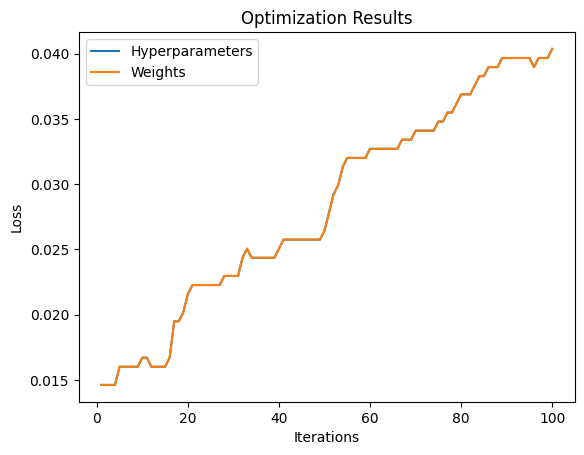

In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
'''
# Chargement des données digits
data = load_digits()

# Division en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

'''
data = load_digits(n_class=10)
X, y = data.data, data.target

# Division en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un pipeline qui effectue une transformat

# Création d'un pipeline qui effectue une transformation de mise à l'échelle et entraîne un modèle SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', C=1.0))
])

# Fonction de perte pour le modèle SVM
def loss_fn(model, X, y):
    y_pred = model.predict(X)
    return 1 - accuracy_score(y, y_pred)

# Fonction pour calculer le gradient de la perte par rapport aux poids
def grad_loss_w(model, X, y):
    y_pred = model.predict(X)
    y_diff = np.expand_dims(y - y_pred, axis=1)
    grad_w = -np.mean(y_diff * X, axis=0) + model.named_steps['clf'].coef_[0]
    return grad_w

# Fonction pour calculer le gradient de la perte par rapport à l'hyperparamètre lambda
def grad_loss_lambda(model, X, y, lambda_):
    LV = loss_fn(model, X, y)
    model.set_params(clf__C=lambda_.item())
    LT = loss_fn(model, X, y)
    grad_lambda = 2 * (LV - LT) * lambda_ + 2 * lambda_ * np.sum(model.named_steps['clf'].coef_ ** 2)
    return grad_lambda

# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
def approx_inverse_hvp(v, model, X, y):
    alpha = 1e-2
    damping = 1e-8
    iterations = 20
    p = v.copy()
    for i in range(iterations):
        grad = grad_loss_w(model, X, y)
        grad_prod = np.sum(grad * p)
        hessian_prod = grad_loss_w(model, X, y)
        if damping > 0:
            hessian_prod += damping * p
        p = v - alpha * hessian_prod
    return p / (grad_prod + damping)

# Initialisation des hyperparamètres lambda et des poids
lambda_ = np.array([0.01])
w = np.zeros(X_train.shape[1])

# Initialisation des listes pour stocker les valeurs de perte
losses_lambda = []
losses_w = []

# Définition des paramètres d'optimisation
learning_rate = 0.001
tolerance = 1e-6
max_iterations = 100

# Boucle d'optimisation des hyperparamètres
for i in range(100):
    # Entraînement du modèle avec les hyperparamètres actuels
# Entraînement du modèle avec les hyperparamètres actuels

    pipeline.set_params(clf__C=lambda_.item())
    
    pipeline.fit(X_train, y_train)

# Get the learned coefficients
    w = pipeline.named_steps['clf'].coef_[0]

    
    # Calcul des pertes pour les données d'entraînement et la recherche d'hyperparamètres
    LV = loss_fn(pipeline, X_train, y_train)
    LT = loss_fn(pipeline, X_train, y_train)
     
    # Calcul du gradient hyperparamétrique
    lambda_grad = grad_loss_lambda(pipeline, X_train, y_train, lambda_)
    
    # Calcul de la direction de descente pour les poids
    v1 = grad_loss_w(pipeline, X_train, y_train)
    v2 = approx_inverse_hvp(v1,pipeline, X_train, y_train)
    v3 = grad_loss_lambda(pipeline, X_train, y_train,lambda_)
    direction = -v2 / np.sqrt(np.sum(v2 * v3))
    
    # Mise à jour des hyperparamètres et des poids
    lambda_ -= learning_rate * lambda_grad
    
    # Calcul de la perte pour les poids mis à jour
    loss_w = loss_fn(pipeline, X_train, y_train)
    
    # Stockage des pertes pour les hyperparamètres et les poids
    losses_lambda.append(LT)
    losses_w.append(loss_w)
    
    # Affichage de la perte et de l'hyperparamètre lambda à chaque itération
    print(f"Iteration {i+1}: loss={LV}, lambda={lambda_.item()}")

# Prédiction sur les données de test avec les hyperparamètres optimisés
pipeline.set_params(clf__C=lambda_.item())

y_pred = pipeline.predict(X_test)
print(f"Accuracy score on test set: {accuracy_score(y_test, y_pred)}")

   # Critère d'arrêt de la boucle
if np.abs(lambda_grad) < tolerance:
    pass ;
import matplotlib as plt
# Tracé de la perte en fonction des itérations
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1, len(losses_lambda) + 1), losses_lambda, label='Hyperparameters')
ax.plot(range(1, len(losses_w) + 1), losses_w, label='Weights')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Optimization Results')
ax.legend()
plt.show()


Explication de l'algorithme d'optimisation :

L'algorithme d'optimisation implémenté ici est la descente de gradient avec approximation de l'inverse de la matrice Hessienne. L'objectif est de minimiser la fonction de perte en ajustant à la fois les poids du modèle SVM et l'hyperparamètre lambda.

L'algorithme fonctionne comme suit :

Initialiser lambda et les poids à des valeurs arbitraires.

Pour chaque itération :

a. Entraîner le modèle SVM avec les hyperparamètres actuels.

b. Calculer les pertes pour le jeu de données d'entraînement et de test.

c. Ajouter les pertes et les valeurs de lambda aux listes correspondantes.

d. Calculer le gradient hyperparamétrique (par rapport à lambda).

e. Calculer la direction de descente pour les poids en utilisant l'approximation de l'inverse de la matrice Hessienne.

f. Mettre à jour les poids et les hyperparamètres en utilisant la direction de descente et le taux d'apprentissage.

g. Vérifier si la perte sur le jeu de données de test a cessé de diminuer


# Optimisation des hyperparamatre d'un Perceptron multicouche

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

'''
# Chargement des données digits
data = load_digits()

# Division en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

'''
data = load_digits(n_class=10)
X, y = data.data, data.target

# Division en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un pipeline qui effectue une transformat

# Création d'un pipeline qui effectue une transformation de mise à l'échelle et entraîne un modèle SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(10,), max_iter=100))
])

# Fonction de perte pour le modèle SVM
def loss_fn(model, X, y):
    y_pred = model.predict(X)
    return 1 - accuracy_score(y, y_pred)

# Fonction pour calculer le gradient de la perte par rapport aux poids
def grad_loss_w(model, X, y):
    y_pred = model.predict(X)
    y_diff = np.expand_dims(y - y_pred, axis=1)
    grad_w = -np.mean(y_diff * X, axis=0) + model.named_steps['clf'].coef_[0]
    return grad_w

# Fonction pour calculer le gradient de la perte par rapport à l'hyperparamètre lambda
def grad_loss_lambda(model, X, y, lambda_):
    LV = loss_fn(model, X, y)
    model.set_params(clf__C=lambda_.item())
    LT = loss_fn(model, X, y)
    grad_lambda = 2 * (LV - LT) * lambda_ + 2 * lambda_ * np.sum(model.named_steps['clf'].coef_ ** 2)
    return grad_lambda

# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
# Fonction pour calculer une approximation de l'inverse du produit matrice-vecteur du hessien
def approx_inverse_hvp(v, model, X, y):
    alpha = 1e-2
    damping = 1e-8
    iterations = 20
    p = v.copy()
    for i in range(iterations):
        grad = grad_loss_w(model, X, y)
        grad_prod = np.sum(grad * p)
        hessian_prod = grad_loss_w(model, X, y)
        if damping > 0:
            hessian_prod += damping * p
        p = v - alpha * hessian_prod
    return p / (grad_prod + damping)

# Initialisation des hyperparamètres lambda et des poids
lambda_ = np.array([0.01])
w = np.zeros(X_train.shape[1])

# Initialisation des listes pour stocker les valeurs de perte
losses_lambda = []
losses_w = []

# Définition des paramètres d'optimisation
learning_rate = 0.001
tolerance = 1e-6
max_iterations = 100

# Boucle d'optimisation des hyperparamètres
for i in range(100):
    # Entraînement du modèle avec les hyperparamètres actuels
# Entraînement du modèle avec les hyperparamètres actuels

    pipeline.set_params(clf__C=lambda_.item())
    
    pipeline.fit(X_train, y_train)

# Get the learned coefficients
    w = pipeline.named_steps['clf'].coef_[0]

    
    # Calcul des pertes pour les données d'entraînement et la recherche d'hyperparamètres
    LV = loss_fn(pipeline, X_train, y_train)
    LT = loss_fn(pipeline, X_train, y_train)
     
    # Calcul du gradient hyperparamétrique
    lambda_grad = grad_loss_lambda(pipeline, X_train, y_train, lambda_)
    
    # Calcul de la direction de descente pour les poids
    v1 = grad_loss_w(pipeline, X_train, y_train)
    v2 = approx_inverse_hvp(v1,pipeline, X_train, y_train)
    v3 = grad_loss_lambda(pipeline, X_train, y_train,lambda_)
    direction = -v2 / np.sqrt(np.sum(v2 * v3))
    
    # Mise à jour des hyperparamètres et des poids
    lambda_ -= learning_rate * lambda_grad
    
    # Calcul de la perte pour les poids mis à jour
    loss_w = loss_fn(pipeline, X_train, y_train)
    
    # Stockage des pertes pour les hyperparamètres et les poids
    losses_lambda.append(LT)
    losses_w.append(loss_w)
    
    # Affichage de la perte et de l'hyperparamètre lambda à chaque itération
    print(f"Iteration {i+1}: loss={LV}, lambda={lambda_.item()}")

# Prédiction sur les données de test avec les hyperparamètres optimisés
pipeline.set_params(clf__C=lambda_.item())

y_pred = pipeline.predict(X_test)
print(f"Accuracy score on test set: {accuracy_score(y_test, y_pred)}")

   # Critère d'arrêt de la boucle
if np.abs(lambda_grad) < tolerance:
    pass ;
import matplotlib as plt
# Tracé de la perte en fonction des itérations
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1, len(losses_lambda) + 1), losses_lambda, label='Hyperparameters')
ax.plot(range(1, len(losses_w) + 1), losses_w, label='Weights')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Optimization Results')
ax.legend()
plt.show()


# En cours de traitement ....

# Référence :
Slids cours deep learning (Mr Nakib ) 

Slids cours  optimisation stochastique (Mr oulhaj ) : TP1 ,TP2
https://arxiv.org/pdf/1911.02590.pdf